# * Kurapati Venkatesh

# * 09012021

# * Topic: Simple Linear Regression ✨

# ---------------------------------------------------------------------------

## Problem Statement:

## A food delivery service recorded the data of  delivery time taken and the time taken for the deliveries to be sorted by the restaurants in order to improve their delivery services. Approach – A Simple Linear regression model needs to be built with target variable ‘Delivery.Time’. Apply necessary transformations and record the RMSE values, Correlation coefficient values for different transformation models.

## -----------------------------------------------------------------------------------

### Problem Objective:
##### A Simple Linear regression model needs to be built with target variable ‘Delivery.Time’

## -------------------------------------------------------------------------------------------

## Import libraries:

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

## import dataset:

In [14]:
st_dt=pd.read_csv(r"G:\360digit\assignments meterial\SLR\delivery_time.csv")

## Data Exploration:

In [15]:
st_dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [20]:
st_dt=st_dt.rename(columns={'Delivery Time': 'dt','Sorting Time': 'st' })

In [21]:
st_dt.head()

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [22]:
st_dt.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


Text(0, 0.5, 'Delivery Time')

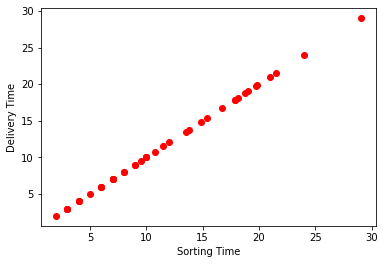

In [33]:
plt.scatter(x=st_dt, y=st_dt, color='red')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

In [25]:
st_dt.describe(include="all")

,dt,st
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Importing statsmodels.formula.api for linear regression model:

In [26]:
import statsmodels.formula.api as smf

In [27]:
model=smf.ols("dt~st",data=st_dt).fit()

In [28]:
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           3.98e-06
Time:                        20:55:30   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The statistics we are mainly concerned with to determine whether the model is viable or not are:
* The coefficients and its p-value(significance)
* R-squared value
* F-statistic and its significance

### Inferences from model:

1. The coefficient for st is 1.6490, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.
2. We have to make sure that the p-value should always be less for the coefficient to be significant.
3. R-squared value is 0.682, which means that 68.2% of the delivery time variance can be explained by the sorting time column using this line.
4. Prob F-statistic has a very low p-value, which gives us that the model fit is not a statistically significant.

In [30]:
model.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,2.979134,10.186334
st,1.108673,2.189367


In [31]:
pred = model.predict(st_dt) # Predicted values of wg using the model

In [32]:
sqrt(mean_squared_error(st_dt.dt, pred))

2.7916503270617654

### Visualization of regression line over the scatter plot of st & dt:

Text(0.5, 0, 'Sorting TIme')

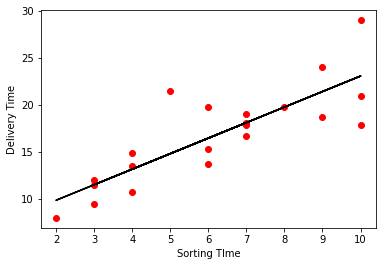

In [36]:
plt.scatter(x=st_dt.st, y=st_dt.dt, color='red')
plt.plot(st_dt.st, pred,color='black')
plt.ylabel("Delivery Time")
plt.xlabel("Sorting TIme")

In [38]:
pred.corr(st_dt.dt)

0.8259972607955325

### Transforming variables for accuracy:

In [42]:
model1 = smf.ols('dt~np.log(st)',data=st_dt ).fit()

In [43]:
model1.params

Intercept     1.159684
np.log(st)    9.043413
dtype: float64

In [44]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           2.64e-06
Time:                        21:39:42   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inferences from model1:

1. The coefficient for dt is 9.0434, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.
2. We have to make sure that the p-value should always be less for the coefficient to be significant.
3. R-squared value is 0.695, which means that 87.8% of the calories variance can be explained by the weight column using this line.
4. Prob F-statistic has a very hifh p-value, which gives us that the model fit is not a statistically significant.

In [45]:
model1.conf_int(0.01)

,0,1
Intercept,-5.862666,8.182033
np.log(st),5.115458,12.971369


In [47]:
pred1 = model1.predict(st_dt)

In [50]:
sqrt(mean_squared_error(st_dt.dt, pred1))

2.733171476682066

In [49]:
pred1.corr(st_dt.dt)

0.8339325279256244

## Conclusion:

Model having highest R-Squared value is better i.e. (model1=0.695 is better than model=0.682). There has good relationship>0.85